In [16]:
import nltk 
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
import json 
import pandas as pd

with open('verbList.json') as f:
    data = json.load(f)
    
with open ("Nima_NE.txt", "r") as myfile:
    entity_list = myfile.read().splitlines()

In [18]:
entity_list = [s.lower() for s in entity_list if s!=""]
entity_list = list(set(entity_list))

In [19]:
entity_list = [e for e in entity_list if len(e)>=3 ]

In [20]:
entity_list

['double',
 'lock',
 'sqlexception',
 'iterator',
 'keystroke',
 'period',
 'beancontextserviceslistener',
 'java.math.bigdecimal',
 'null',
 'mime',
 'orb',
 'domstring',
 'codepoint',
 'listener',
 'w3cendpointreference',
 'void',
 'inetaddress',
 'qname ',
 'sortedmap',
 'hashmap',
 'sqlrowid',
 'sqlarray',
 'itemlistener',
 'hashtable',
 'xmladapter',
 'idl',
 'deque',
 'celleditor',
 'true',
 'line2d',
 'datalink',
 'offset',
 'localtime',
 'pkixcertpathchecker',
 'jformattedtextfieldpropertychangelistener',
 'sqlxml',
 'corba',
 'sqlnclob',
 'float',
 'sqlwarning',
 'actionmapkey',
 'uri',
 'attribute',
 'rmi',
 'charsequence',
 'jviewport',
 'time-zone',
 'thread',
 'layoutmanager',
 'list',
 'parseposition',
 'object',
 'keymap',
 'listui',
 'jtableheader',
 'java.sql.date',
 'mbeanserverconnection',
 'rmiserverimpl.close()',
 'beancontextmembershiplistener',
 'vector',
 'byte',
 'treeselection',
 'xml',
 'treeexpansion',
 'long',
 'dictionary',
 'sqlclob',
 'beancontext',
 'me

In [21]:
len(entity_list)

154

In [22]:
len(entity_list)

154

In [23]:
# res = dict((v,k) for k,v in a.items())

In [24]:
new_dict={}
for k,v in data.items():
    for value in v:
        new_dict[value]=k

In [25]:
# print(new_dict)

In [26]:
# df = pd.read_csv("big_data_POS_analysis.csv")
df = pd.read_csv("api_method_desc.csv")


In [27]:
df["query"] = df["api_method_desc"]
df["apis"] = df["api_method"]

In [28]:
df=df[["query","apis"]]
df

,query,apis
0,Gets the Object associated with the specified ...,javax.swing.AbstractAction.getValue
1,Sets the Value associated with the specified key.,javax.swing.AbstractAction.putValue
2,Returns true if the action is enabled.,javax.swing.AbstractAction.isEnabled
3,Sets whether the Action is enabled. The defaul...,javax.swing.AbstractAction.setEnabled
4,Returns an array of Objects which are keys for...,javax.swing.AbstractAction.getKeys
...,...,...
31731,This operation is invoked whenever a servant f...,org.omg.PortableServer._ServantActivatorStub.e...
31732,Description copied from class: ObjectImpl,org.omg.PortableServer._ServantActivatorStub._ids
31733,This operations is used to get a servant that ...,org.omg.PortableServer._ServantLocatorStub.pre...
31734,This operation is invoked whenener a servant c...,org.omg.PortableServer._ServantLocatorStub.pos...


In [29]:
query_list = df["query"].to_list()
api_list = df["apis"].to_list()

In [30]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
  
example_sent = """This is a sample sentence, 
                  showing off the stop words filtration."""
  
stop_words = set(stopwords.words('english'))  
  
word_tokens = word_tokenize(example_sent)  
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 

In [31]:
def get_verb(query):
    res_verb =""
    for verb in new_dict.keys():
        if verb in query:
            res_verb=verb
            break
    return res_verb

def get_entity(query):
    
    res_entities =[]
    for entity in entity_list:
        sentence = query.split(" ")
#         print(sentence)
        filtered_sentence = [w for w in sentence if not w.lower() in stop_words] 
        if entity in filtered_sentence:
            res_entities.append(entity)
    return res_entities

In [32]:
ct = 0
result_list=[]
for idx, query in enumerate(query_list):
    verb = get_verb(query)
    entities = get_entity(query)
    if verb =="":
        continue
    if len(entities) ==0:
        continue
    verb = new_dict[verb]
#     print(verb, entities)
    result_list.append((verb,entities,api_list[idx]))

    ct+=1

In [33]:
result_list

[('convert', ['true'], 'javax.swing.AbstractAction.isEnabled'),
 ('convert', ['null', 'set', 'array'], 'javax.swing.AbstractAction.getKeys'),
 ('append',
  ['listener'],
  'javax.swing.AbstractAction.addPropertyChangeListener'),
 ('append',
  ['listener'],
  'javax.swing.AbstractAction.removePropertyChangeListener'),
 ('connect',
  ['array'],
  'javax.swing.AbstractAction.getPropertyChangeListeners'),
 ('connect',
  ['null'],
  'javax.lang.model.util.AbstractAnnotationValueVisitor6.visit'),
 ('test',
  ['object', 'set'],
  'javax.swing.border.AbstractBorder.getBorderInsets'),
 ('choose', ['false'], 'javax.swing.AbstractButton.isSelected'),
 ('create', ['null', 'object', 'set'], 'javax.swing.AbstractButton.setMargin'),
 ('close', ['set'], 'javax.swing.AbstractButton.setIcon'),
 ('perform', ['set'], 'javax.swing.AbstractButton.getDisabledIcon'),
 ('perform', ['set'], 'javax.swing.AbstractButton.getDisabledSelectedIcon'),
 ('perform', ['set'], 'javax.swing.AbstractButton.removeNotify'),
 

In [34]:
len(result_list) 

14700

In [35]:
# >>> from pyvis.network import Network
# >>> net = Network()

# >>> net.add_node(1, label="Node 1") # node id = 1 and label = Node 1
# >>> net.add_node(2) # node id and label = 2


# net.add_edge(0, 1)


# >>> nt.from_nx(nx_graph)
# >>> nt.show("nx.html")

In [36]:
!pip install pyvis

In [37]:

from pyvis.network import Network
net = Network("1024px", "1080px")
count = 0
for r in result_list:
    verb=r[0]
    entities=r[1]
    api=r[2]
    if len(entities)==1:
        count+=1
        net.add_node(entities[0],label = entities[0])
        net.add_edge(entities[0], entities[0],text=verb)
    else:
        for e in entities[:2]:
            net.add_node(e, label = e)  
        count+=1
        net.add_edge(entities[0], entities[1],text=verb)
print(count)
net.show_buttons()
net.show("nx.html")

14700


In [38]:
len(net.edges)

547

In [39]:
len(net.nodes)

59

In [40]:

import networkx as nx
G = nx.Graph()

for r in result_list:
    verb=r[0]
    entities=r[1]
    api=r[2]
    if len(entities)==1:
        G.add_node(entities[0])
        G.add_edge(entities[0], entities[0],text=verb)
    else:
        for e in entities[:2]:
            G.add_node(e)  
        G.add_edge(entities[0], entities[1],text=verb)



In [41]:
print(nx.info(G))


Name: 
Type: Graph
Number of nodes: 59
Number of edges: 547
Average degree:  18.5424


In [42]:
density = nx.density(G)
print("Network density:", density)


Network density: 0.3196960841613092


In [43]:
si = nx.shortest_path(G, source="vector", target="uri")

print("Shortest path string Fell and integer:", si)


Shortest path string Fell and integer: ['vector', 'object', 'uri']


In [44]:
#node importance
from operator import itemgetter
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)


In [45]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)


Top 20 nodes by degree:
('object', 49)
('set', 48)
('null', 43)
('true', 42)
('attribute', 39)
('array', 38)
('class', 37)
('string', 35)
('field', 34)
('system', 33)
('list', 31)
('thread', 31)
('offset', 30)
('exception', 30)
('byte', 30)
('long', 29)
('stream', 27)
('int', 26)
('double', 24)
('range', 22)


In [46]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')


In [47]:
from networkx.algorithms import community
communities = community.greedy_modularity_communities(G)

modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G, modularity_dict, 'modularity')


In [48]:
# First get a list of just the nodes in that class
class0 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 0]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class0}

# Then sort that dictionary and print the first 5 results
class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by Eigenvector Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])


Modularity Class 0 Sorted by Eigenvector Centrality:
Name: class | Eigenvector Centrality: 0.21122655938479215
Name: attribute | Eigenvector Centrality: 0.20696303279909617
Name: field | Eigenvector Centrality: 0.2033034379922007
Name: byte | Eigenvector Centrality: 0.18898288717884085
Name: double | Eigenvector Centrality: 0.15417583887496544


In [49]:
# First get a list of just the nodes in that class
class1 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 1]

# Then create a dictionary of the eigenvector centralities of those nodes
class1_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class1}

# Then sort that dictionary and print the first 5 results
class1_sorted_by_eigenvector = sorted(class1_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 1 Sorted by Eigenvector Centrality:")
for node in class1_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])


Modularity Class 1 Sorted by Eigenvector Centrality:
Name: null | Eigenvector Centrality: 0.2138577318706412
Name: string | Eigenvector Centrality: 0.20283164317236263
Name: system | Eigenvector Centrality: 0.19320446066389785
Name: list | Eigenvector Centrality: 0.18942172899267629
Name: offset | Eigenvector Centrality: 0.18228819308614286


In [50]:
# First get a list of just the nodes in that class
class2 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 2]

# Then create a dictionary of the eigenvector centralities of those nodes
class2_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class2}

# Then sort that dictionary and print the first 5 results
class2_sorted_by_eigenvector = sorted(class2_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 2 Sorted by Eigenvector Centrality:")
for node in class2_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])

Modularity Class 2 Sorted by Eigenvector Centrality:
Name: set | Eigenvector Centrality: 0.2409192417066557
Name: true | Eigenvector Centrality: 0.21554522113476418
Name: array | Eigenvector Centrality: 0.21328684239891332
Name: map | Eigenvector Centrality: 0.10457096098625386
Name: serializable | Eigenvector Centrality: 0.07634534481987211


In [51]:
# First get a list of just the nodes in that class
class2 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 3]

# Then create a dictionary of the eigenvector centralities of those nodes
class2_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class2}

# Then sort that dictionary and print the first 5 results
class2_sorted_by_eigenvector = sorted(class2_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 3 Sorted by Eigenvector Centrality:")
for node in class2_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])

Modularity Class 3 Sorted by Eigenvector Centrality:
Name: thread | Eigenvector Centrality: 0.18347903341755356
Name: exception | Eigenvector Centrality: 0.1789130429353437
Name: stream | Eigenvector Centrality: 0.16918823255007023
Name: false | Eigenvector Centrality: 0.10268173606265432
Name: iterator | Eigenvector Centrality: 0.1006794657172211


In [52]:
# First get a list of just the nodes in that class
class2 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 4]

# Then create a dictionary of the eigenvector centralities of those nodes
class2_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class2}

# Then sort that dictionary and print the first 5 results
class2_sorted_by_eigenvector = sorted(class2_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 4 Sorted by Eigenvector Centrality:")
for node in class2_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])

Modularity Class 4 Sorted by Eigenvector Centrality:
Name: long | Eigenvector Centrality: 0.1802773630284891
Name: int | Eigenvector Centrality: 0.15785301598372517
Name: range | Eigenvector Centrality: 0.14534432908642111
Name: char | Eigenvector Centrality: 0.10153120391711559
Name: calendar | Eigenvector Centrality: 0.06651583886180071


In [53]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', list(c)) # Print out the classes and their members


Class 0: ['keymap', 'byte', 'listener', 'double', 'void', 'attribute', 'lock', 'class', 'boolean', 'integer', 'field', 'mime', 'float']
Class 1: ['offset', 'system', 'zip', 'enumeration', 'none', 'string', 'time-zone', 'period', 'rmi', 'null', 'list', 'short', 'date']
Class 2: ['uri', 'xml', 'checkbox', 'array', 'currency', 'set', 'dictionary', 'hashtable', 'true', 'serializable', 'map', 'vector']
Class 3: ['stack', 'deque', 'iterator', 'exception', 'thread', 'stream', 'false', 'queue']
Class 4: ['calendar', 'hashmap', 'range', 'int', 'long', 'char']
Class 5: ['coordinates', 'polygon', 'keystroke', 'typecode', 'object']


In [54]:
    def set_node_community(G, communities):
        '''Add community to node attributes'''
        for c, v_c in enumerate(communities):
            for v in v_c:
                # Add 1 to save 0 for external edges
                G.nodes[v]['community'] = c + 1

    def set_edge_community(G):
        '''Find internal edges and add their community to their attributes'''
        for v, w, in G.edges:
            if G.nodes[v]['community'] == G.nodes[w]['community']:
                # Internal edge, mark with community
                G.edges[v, w]['community'] = G.nodes[v]['community']
            else:
                # External edge, mark as 0
                G.edges[v, w]['community'] = 0

    def get_color(i, r_off=1, g_off=1, b_off=1):
        '''Assign a color to a vertex.'''
        r0, g0, b0 = 0, 0, 0
        n = 16
        low, high = 0.1, 0.9
        span = high - low
        r = low + span * (((i + r_off) * 3) % n) / (n - 1)
        g = low + span * (((i + g_off) * 5) % n) / (n - 1)
        b = low + span * (((i + b_off) * 7) % n) / (n - 1)
        return (r, g, b)  

In [55]:
    # Set node and edge communities
    set_node_community(G, communities)
    set_edge_community(G)

    node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

    # Set community color for edges between members of the same community (internal) and intra-community edges (external)
    external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
    internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
    internal_color = ['black' for e in internal]

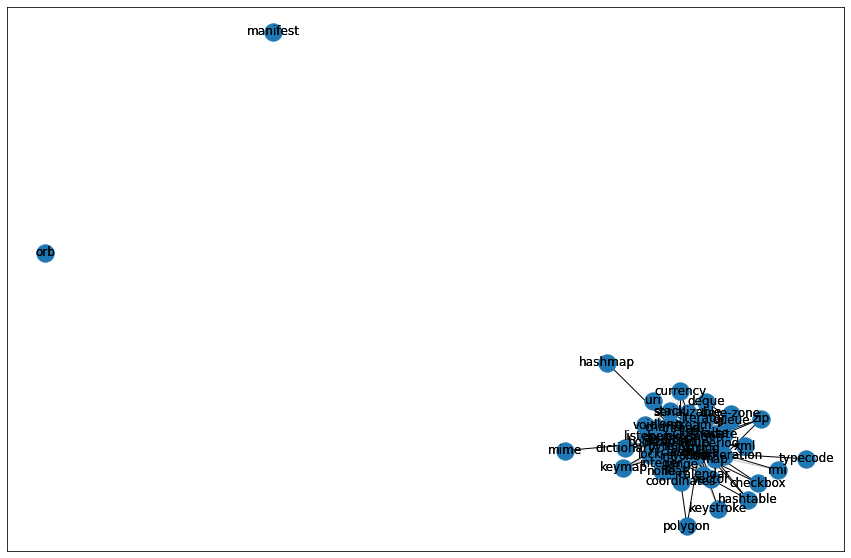

In [68]:

import matplotlib.pyplot as plt
_pos = nx.spring_layout(G)

plt.rcParams.update({'figure.figsize': (15, 10)})
   # Draw external edges
nx.draw_networkx(G, pos=_pos, node_size=0,edgelist=external,edge_color="silver")
    # Draw nodes and internal edges
nx.draw_networkx(G,pos=_pos, node_color=node_color, edgelist=internal, edge_color=internal_color)